In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

format = {'f':'{:.0f}', '%':'{:.1f} %'}
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')


TITANIC

In [23]:
#ladataan tietokanta ja katsotaan tunnuslukuja

df = pd.read_csv(r"C:\Users\nikla\Downloads\titanic_new.xlsx - Sheet1.csv")
df.describe()

,Unnamed: 0,pclass,survived,sibsp,parch,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,121.000000
mean,654.500000,2.293893,0.382443,0.498473,0.384733,160.809917
std,378.308736,0.838280,0.486169,1.041352,0.865295,97.696922
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,327.250000,2.000000,0.000000,0.000000,0.000000,72.000000
50%,654.500000,3.000000,0.000000,0.000000,0.000000,155.000000
75%,981.750000,3.000000,1.000000,1.000000,0.000000,256.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,328.000000


survived mean: 0,38244 = 38 % matkustajista selvisi hengissä

In [3]:
#Kuinka paljon laivalla oli miehiä ja naisia

df1 = pd.crosstab(df['sex'], 'f')
df1.columns.name = ''

df1['%'] = df1['f']/df1['f'].sum()*100
df1.style.format(format)
df1.round(1)

,f,%
sex,,
female,466,35.6
male,844,64.4


In [4]:
#Ristiintaulukko sukupuoli/selviytyminen

df2 = pd.crosstab(df['survived'], df['sex'])
tulos = ['Died', 'Survived']
df2.index = tulos
df2.loc['Total']=df2.sum()
df2

sex,female,male
Died,127,682
Survived,339,162
Total,466,844


Naisilla oli huomattavasti parempi selviytymisprosentti

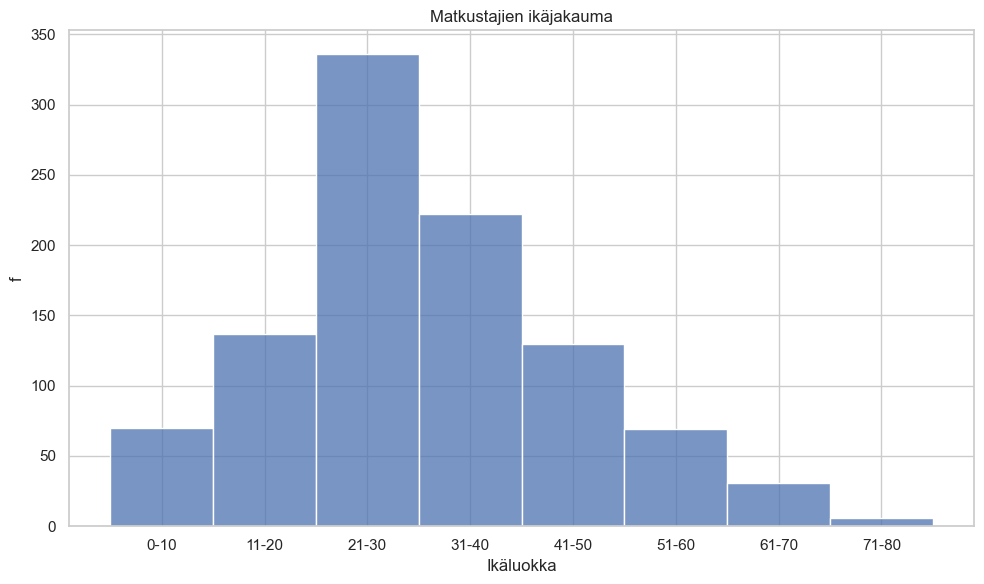

In [5]:
#Ikäjakauma visualisoituna

#Tässä tuli TypeErroreita, jätetään pois tyhjät ja muut kuin kokonaisluvut
df1 = df.dropna(subset=['age'])
df1 = df1[df1['age'].apply(lambda x: str(x).isdigit())]
df1['age'] = df1['age'].astype(int)

#Luodaan luokitellut jakaumat
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df1['Ikäluokka'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False)

#Visualisointi
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.histplot(data=df1, x='Ikäluokka', bins=len(age_labels), discrete=True)
plt.title('Matkustajien ikäjakauma')
plt.xlabel('Ikäluokka')
plt.ylabel('f')

plt.tight_layout()
plt.show()

Nuoria aikuisia oli selvästi eniten

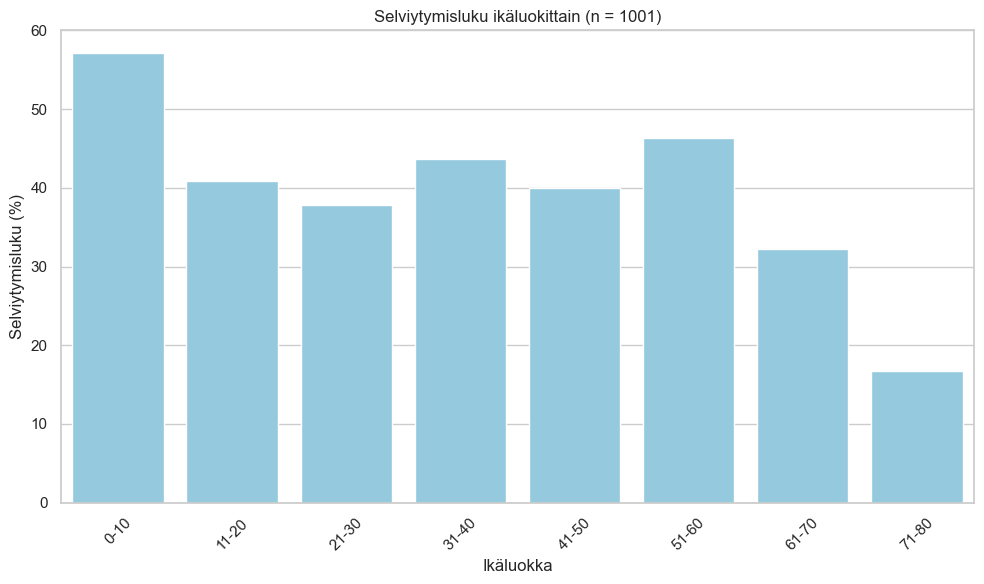

In [6]:
#Miten selviytymisluku jakautui ikäluokittain prosenteissa? (kokeilua...)
grouped_data = df1.groupby('Ikäluokka')['survived'].agg(['count', 'sum']).reset_index()

grouped_data['SurvivalRate'] = grouped_data['sum'] / grouped_data['count'] * 100

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(data=grouped_data, x='Ikäluokka', y='SurvivalRate', color='skyblue')

plt.title('Selviytymisluku ikäluokittain (n = {})'.format(df1['Ikäluokka'].count()))
plt.xlabel('Ikäluokka')
plt.ylabel('Selviytymisluku (%)')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

HUOM! Otanta n=1001 on merkittävästi alkuperäistä n=1310 pienempi, kun tyhjät on otettu pois. Oletettavasti kuolleiden osuus pudonneessa datassa on paljon suurempaa.

Vauvoilla ja lapsilla oli kaikista parhaat mahdollisuudet selviytyä hengissä, kun taas vanhuksilla kaikista alhaisimmat.

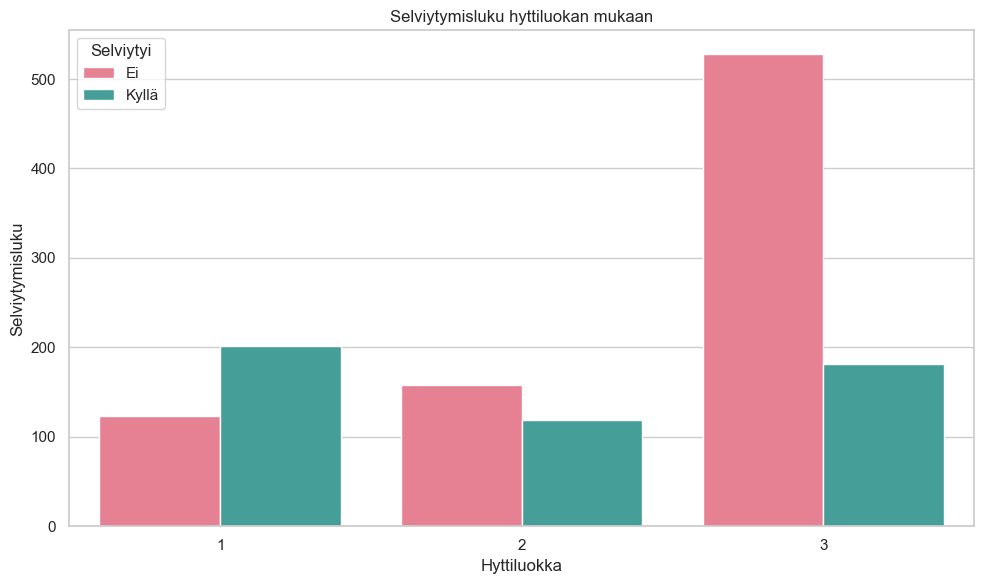

In [7]:
#Oliko hyttiluokalla merkitystä selviytymisen kannalta?

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='pclass', hue='survived', palette='husl')

plt.title('Selviytymisluku hyttiluokan mukaan')
plt.xlabel('Hyttiluokka')
plt.ylabel('Selviytymisluku')

plt.legend(title='Selviytyi', loc='upper left', labels=['Ei', 'Kyllä'])
plt.tight_layout()
plt.show()


Huonoja uutisia 3.luokan hytissä majoittuneille...

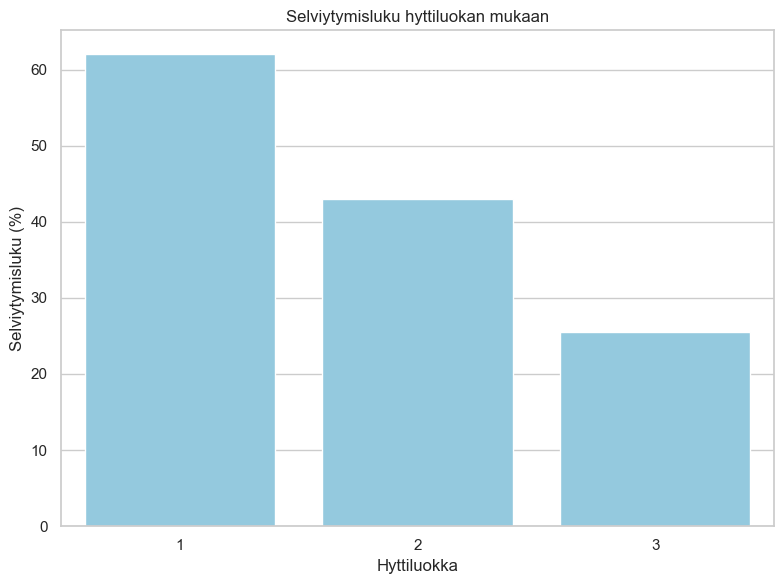

In [8]:
#Katsotaan myös prosenttien kautta

survival_rate = df.groupby('pclass')['survived'].mean() * 100
survival_rate = survival_rate.round(2)

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rate.index, y=survival_rate.values, color='skyblue')

plt.title('Selviytymisluku hyttiluokan mukaan')
plt.xlabel('Hyttiluokka')
plt.ylabel('Selviytymisluku (%)')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Jopa yllättävän tasainen lasku selviytymismahdollisuuksissa hyttiluokittain. 1.luokka n. 61 %, 2.luokka n.42 %, 3.luokka n. 25%

In [9]:
#Korrelaatio hyttiluokan ja selviytymisen välillä

correlation = df['pclass'].corr(df['survived'])
correlation

-0.3134910133534594

Kohtalainen negatiivinen korrelaatio, ts. hyttiluokan "noustessa" toiseen ja kolmanteen luokkaan, selviytymismahdoliisuus pienenee

In [10]:
#Tarkastetaan tilastollinen merkittävyys / p-arvo

from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['pclass'], df['survived'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: -0.3134910133534599
P-value: 2.8993262908341706e-31


"Mitä pienempi p-arvo, sitä merkitsevämpi korrelaatio"
Saamamme tulos 0.000000000000000000000000000002899 voidaan tulkita tilastollisesti merkittäväksi

---------------------------------------------------------------------------

SECOND DATASET:

IBM HR Analytics Employee Attrition & Performance 


In [11]:
df5 = pd.read_csv(r"C:\Users\nikla\OneDrive\Työpöytä\Haaga-Helia\Data-analytiikka\Tehtävät\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
#Tilastolliset tunnusluvut

df5.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#Data sisältää 18-60 -vuotiaita. Näytetään 60-vuotiaat:
df5[df5['Age']==60]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,...,4,80,0,33,5,1,29,8,11,10
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,...,4,80,0,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4,80,0,10,1,3,2,2,2,2
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,...,2,80,1,12,3,3,11,7,1,9
1209,60,No,Travel_Rarely,370,Research & Development,1,4,Medical,1,1697,...,3,80,1,19,2,4,1,0,0,0


In [14]:
#Jakauma koulutustason mukaan

education = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
df6 = pd.crosstab(df5['Education'], 'f')
df6.columns.name = ''
df6.index = education
n = df6['f'].sum()
df6['%'] = df6['f']/n*100
df6.loc['Total'] = df6.sum()
df6

,f,%
Below College,170.0,11.564626
College,282.0,19.183673
Bachelor,572.0,38.911565
Master,398.0,27.074830
Doctor,48.0,3.265306
Total,1470.0,100.000000


Valtaosa korkeakoulutettuja, bachelor- ja master-tason koulutus yleisin

In [15]:
#Palkkojen vertailua koulutustasojen välillä

df7 = df5.groupby('Education')['MonthlyIncome'].describe()
df7.index = education
df7.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Below College,170,5641,4485,1009,2693,3849,7170,19973
College,282,6227,4525,1051,3067,4892,6840,19613
Bachelor,572,6517,4817,1081,2760,4762,8808,19926
Master,398,6832,4657,1359,3483,5342,8726,19999
Doctor,48,8278,5061,2127,4731,6203,11732,19586


Palkkataso nousee koulutustason myötä. Mielenkiintoisena yksityiskohtana, korkein palkka jokaisessa ryhmässä pyörii lähes samoissa lukemissa.

In [16]:
#Valikoidaan muutama määrällinen muuttuja korrelaatiolaskentaa varten

df8 = df5.loc[:,['Age','YearsInCurrentRole','YearsSinceLastPromotion','MonthlyIncome','YearsAtCompany']]
df8

,Age,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyIncome,YearsAtCompany
0,41,4,0,5993,6
1,49,7,1,5130,10
2,37,0,0,2090,0
3,33,7,3,2909,8
4,27,2,2,3468,2
...,...,...,...,...,...
1465,36,2,0,2571,5
1466,39,7,1,9991,7
1467,27,2,0,6142,6
1468,49,6,0,5390,9


In [17]:
korrelaatiot = df8.corr()
korrelaatiot

,Age,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyIncome,YearsAtCompany
Age,1.000000,0.212901,0.216513,0.497855,0.311309
YearsInCurrentRole,0.212901,1.000000,0.548056,0.363818,0.758754
YearsSinceLastPromotion,0.216513,0.548056,1.000000,0.344978,0.618409
MonthlyIncome,0.497855,0.363818,0.344978,1.000000,0.514285
YearsAtCompany,0.311309,0.758754,0.618409,0.514285,1.000000


<Axes: >

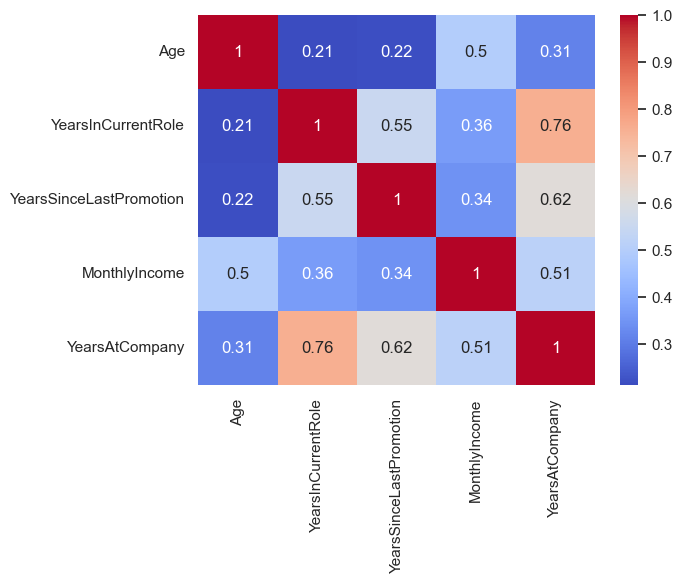

In [18]:
#Korrelaatiot visuaalisesti ilmaistuna heatmapin avulla

sns.heatmap(korrelaatiot, annot=True, cmap = 'coolwarm')


Merkittävimpiä (positiivisia) korrelaatioita löydetään seuraavien muuttujien välillä:

palvelusvuodet ja kuinka monta vuotta kulunut viime ylennyksestä, 

palvelusvuodet ja vuodet nykyisessä roolissa, 

palvelusvuodet tai ikä ja kuukausipalkka.


Ei yllätyksiä

In [19]:
#Muuttujien korrelaatiokertoimet ja p-arvot muuttujan "YearsAtCompany" kanssa

for muuttuja in df8:
    df8_dropna = df8.dropna(subset=[muuttuja, 'YearsAtCompany'])
    r, p = pearsonr(df8_dropna['YearsAtCompany'], df8_dropna[muuttuja])
    print(f'{muuttuja:<18} r = {r:>6.3f}, p = {p:.3f}')

Age                r =  0.311, p = 0.000
YearsInCurrentRole r =  0.759, p = 0.000
YearsSinceLastPromotion r =  0.618, p = 0.000
MonthlyIncome      r =  0.514, p = 0.000
YearsAtCompany     r =  1.000, p = 0.000


Kuten todettu, palvelusvuodet (YearsAtCompany) korreloi usean muuttujan kanssa. Pieni p-arvo jokaisen muuttujan kohdalla kertoo merkitsevästä korrelaatiosta.

In [20]:
#Luodaan ikäluokat

age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-29', '30-39', '40-49', '50-60']


df5['AgeGroup'] = pd.cut(df5['Age'], bins=age_bins, labels=age_labels, right=False)


<Axes: xlabel='AgeGroup', ylabel='Count'>

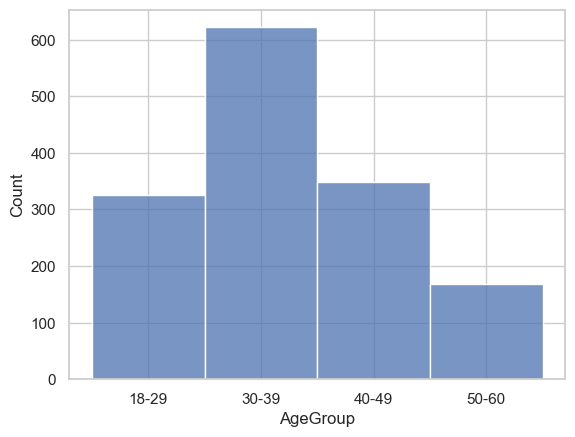

In [21]:
#Histogrammi luokitellun jakauman tarkasteluun

sns.histplot(df5['AgeGroup'],bins=age_bins)

Suurin ikäluokka 30-39 -vuotiaat

<Figure size 800x600 with 0 Axes>

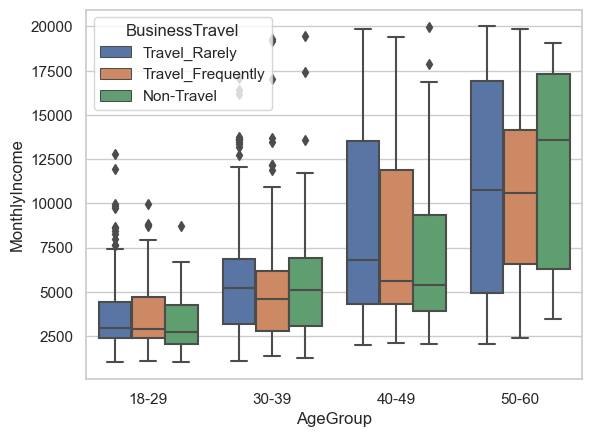

<Figure size 800x600 with 0 Axes>

In [22]:
#Boxplot: palkka ikäluokan ja työmatkailun perusteella

sns.boxplot(data=df5, x='AgeGroup', y='MonthlyIncome', hue='BusinessTravel')
plt.figure(figsize=(8, 6))

Suurimmat palkat saavutetaan myöhemmällä iällä, toki huomioitavaa että palkkahaitari on erittäin laaja varsinkin 50-60 -vuotiaiden ikäluokassa. Mielenkiintoisena havaintona, usein työmatkoja tekevät pääsevät parhaimpiin ansioihin ainoastaan 18-29 -vuotiaiden ikäluokassa. 